In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

mse = list()
n = 200
n_iter = 1000

for i in range(n_iter):
    X = np.linspace(0, 99, n)
    y = X + np.random.normal(0, 1, n)
    
    mse.append(list())
    
    for k in range(2, n+1):
        cv = KFold(n_splits=k, shuffle=True, random_state=i)
        score = cross_val_score(LinearRegression(), X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=cv)
        mse[-1].append(score.mean() * -1)

In [33]:
mtx = np.transpose(mse)
variance = list()

for row in mtx:
    variance.append(np.var(row))

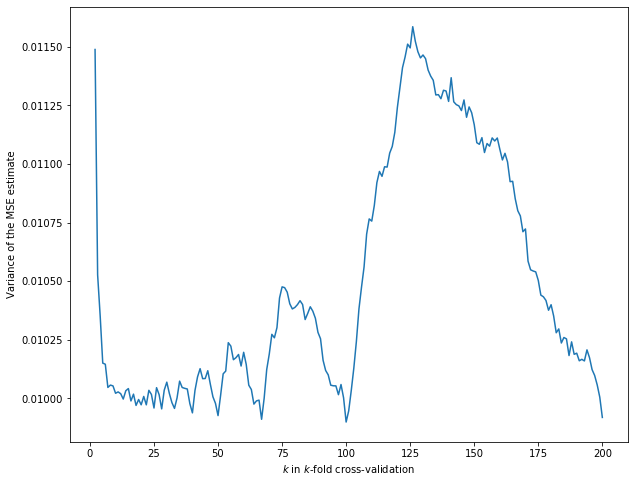

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(2, len(X) + 1), variance)
ax.set_xlabel(r"$k$ in $k$-fold cross-validation")
ax.set_ylabel('Variance of the MSE estimate');